## Results for Notch-Delta-Jagged including Fringe effect

Equations:

\begin{equation}
\frac{dN}{dt} = N_0 H^{S+}(I) -  N ( (k_c D + kt D_{ext}) H^{S+}(I)] + (k_c J + k_t J_{ext}) H^{S-}(I)) - \gamma N
\end{equation}

\begin{equation}
\frac{dD}{dt} = D_0 H^{S-}(I) - k_c D N H^{S+}(I)- k_t D N_{ext} - \gamma D
\end{equation}

\begin{equation}
\frac{dJ}{dt} = J_0 H^{S+}(I) - k_c J N H^{S-}(I) - k_t J N_{ext} - \gamma J 
\end{equation}

\begin{equation}
\frac{dI}{dt} = k_t N (D_{ext} H^{S+}(I) + J_{ext} H^{S-}(I)) - \gamma_I I 
\end{equation}


In [3]:
import numpy as np
import random as rand
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp
import PyDSTool_aux_functions as aux
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
nmodel = 'modelNDJF_Ang_2cells'
DSargs      = args(name=nmodel, checklevel=2)
DSargs.pars = {'g'  : 1.0e-1                                                  # degradation of a protein 
              ,'gI' : 5.0e-1                                                  # degradation of NICD 
              ,'kc' : 5.0e-4                                                  # rate of cis interaction
              ,'kt' : 2.5e-5                                                  # rate of trans interaction
              ,'p'  : 2.0e+0, 'pj' : 5.0e+0                                   # hill coeficient
              ,'I0' : 2.0e+2, 'V0' : 2.0e+2                                   # hill factor
              ,'Nt' : 0.0e+3, 'Dt' : 0.0e+3, 'Jt' : 0.0e+3, 'Vt' : 2.0e+3     # external proteins
              ,'N0' : 1.2e+3, 'D0' : 1.0e+3, 'J0' : 0.8e+3, 'R0' : 1.0e+3     # production rate
              ,'ln' : 2.0e+0, 'ld' : 0.0e+0, 'lj' : 2.0e+0                    # lambda of shifted hill function
              ,'lv' : 0.0e+0, 'ldv': 2.0e+0
              ,'pf' : 1.0
              ,'ldf': 3.0,    'ljf': 0.3
              }
DSargs.varspecs = {'N1': '''N0*HS(I1,I0,p,ln) - N1*( (kc*D1 + kt*(D2+Dt))*HS(I1,I0,pf,ldf) 
                                                   + (kc*J1 + kt*(J2+Jt))*HS(I1,I0,pf,ljf) ) - g*N1'''
                  ,'N2': '''N0*HS(I2,I0,p,ln) - N2*( (kc*D2 + kt*(D1+Dt))*HS(I2,I0,pf,ldf) 
                                                   + (kc*J2 + kt*(J1+Jt))*HS(I2,I0,pf,ljf) ) - g*N2'''
                  ,'D1': '''D0*HS(I1,I0,p,ld)*HS(kt*Vt*R1/gI,V0,p,ldv) - D1*( kc*N1*HS(I1,I0,pf,ldf) 
                                                                       + kt*(N2+Nt)*HS(I2,I0,pf,ldf) ) - g*D1'''
                  ,'D2': '''D0*HS(I2,I0,p,ld)*HS(kt*Vt*R2/gI,V0,p,ldv) - D2*( kc*N2*HS(I2,I0,pf,ldf) 
                                                                       + kt*(N1+Nt)*HS(I1,I0,pf,ldf) ) - g*D2'''
                  ,'J1': 'J0*HS(I1,I0,pj,lj) - J1*( kc*N1*HS(I1,I0,pf,ljf) + kt*(N2+Nt)*HS(I2,I0,pf,ljf) ) - g*J1'
                  ,'J2': 'J0*HS(I2,I0,pj,lj) - J2*( kc*N2*HS(I2,I0,pf,ljf) + kt*(N1+Nt)*HS(I1,I0,pf,ljf) ) - g*J2'
                  ,'I1': 'kt*N1*( (D2+Dt)*HS(I1,I0,pf,ldf) + (J2+Jt)*HS(I1,I0,pf,ljf) ) - gI*I1'
                  ,'I2': 'kt*N2*( (D1+Dt)*HS(I2,I0,pf,ldf) + (J1+Jt)*HS(I2,I0,pf,ljf) ) - gI*I2'
                  ,'R1': 'R0*HS(I1,I0,p ,lv) - kt*Vt*R1 - g*R1'
                  ,'R2': 'R0*HS(I2,I0,p ,lv) - kt*Vt*R2 - g*R2' 
                  }
DSargs.fnspecs  = [aux.functions()]
DSargs.ics      = {'N1': 0,'D1': 0,'J1': 0,'R1': 0,'I1': 0,
                   'N2': 0,'D2': 0,'J2': 0,'R2': 0,'I2': 0
                  }
DSargs.xdomain  = {'N1': [0, 2.0e+4],'D1': [0, 2.0e+4],'J1': [0, 5.0e+4],'R1': [0, 1.0e+4],'I1': [0, 1.0e+4],
                   'N2': [0, 2.0e+4],'D2': [0, 2.0e+4],'J2': [0, 5.0e+4],'R2': [0, 1.0e+4],'I2': [0, 1.0e+4]
                  }
DSargs.pdomain  = {'Vt': [0, 10000]
                  }
DSargs.tdomain  = [0., 100.]
DSargs.algparams= {'init_step':0.1}
ODE = Vode_ODEsystem(DSargs)

/usr/lib/python2.7/dist-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python2.7/dist-packages/scipy/optimize/minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


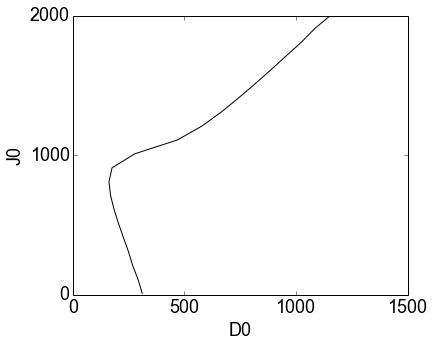

In [5]:
v = 'J0'
r_v = range(10,2011,100)
freepar = 'D0'
DSargs.pdomain[freepar] = [0, 1501]
ODE = Vode_ODEsystem(DSargs)
ODE.set(pars = {'Vt': 2000})
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=0.1, silence=True, show_continuation=False, 
                      xlim=[0,1500], ylim=[0, 2000], LocBifPoints=['BP','B'], BifPoints='BP', 
                      xticks=[0, 500, 1000, 1500], yticks=[0, 1000, 2000], 
                      fig_name='./figures/PhaseDiagram_D0J0_Vt2000.pdf')

BP Point found 
B Point found 
B Point found 


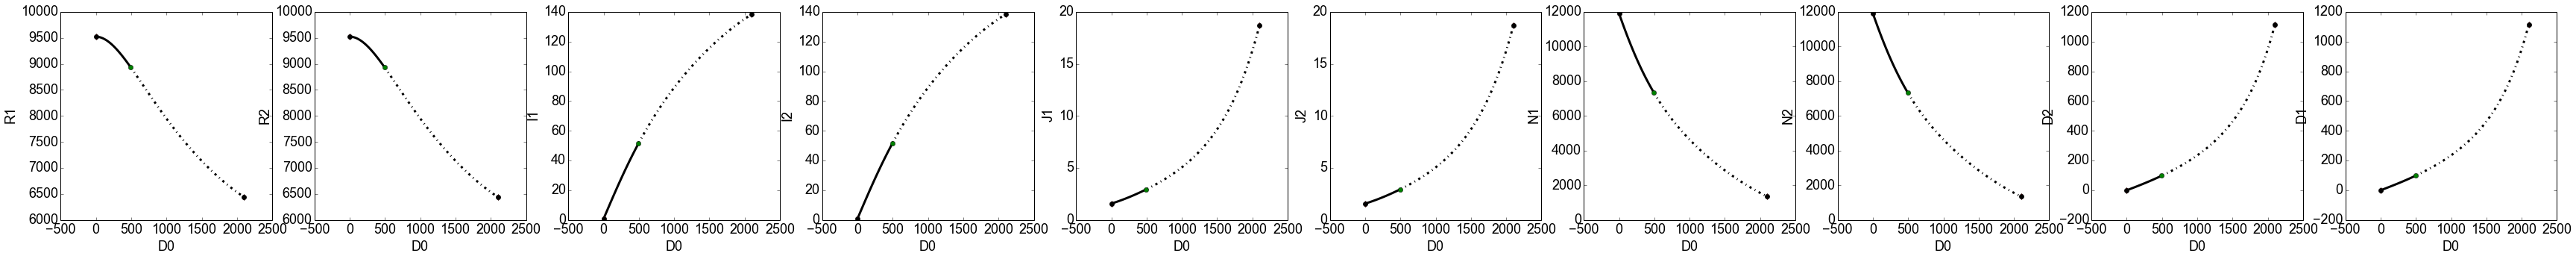

BP Point found 
B Point found 
B Point found 


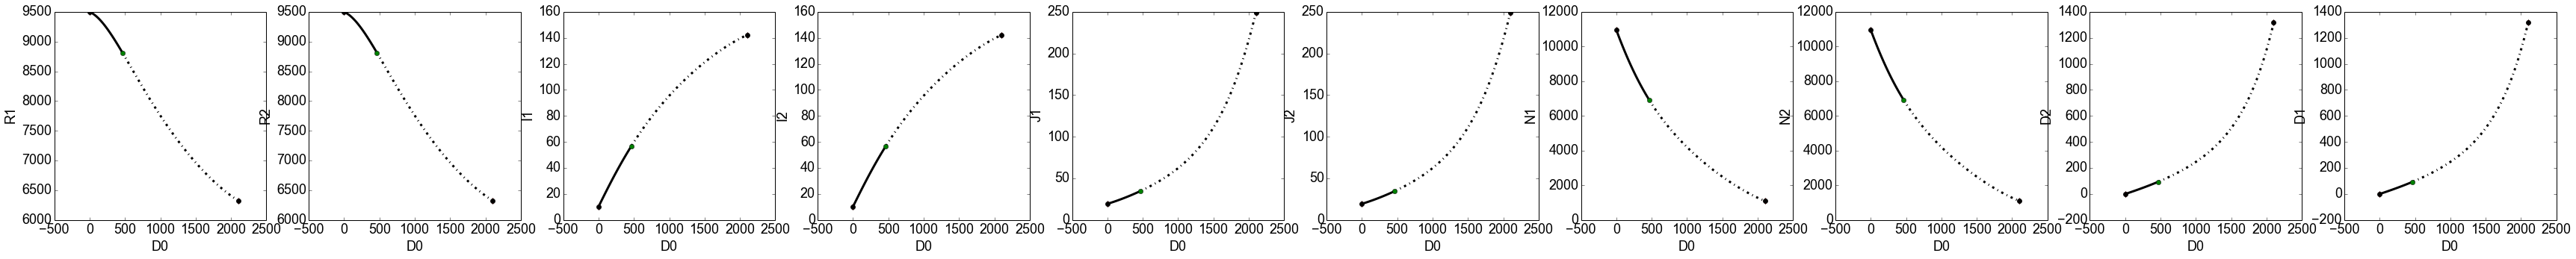

BP Point found 
B Point found 
B Point found 


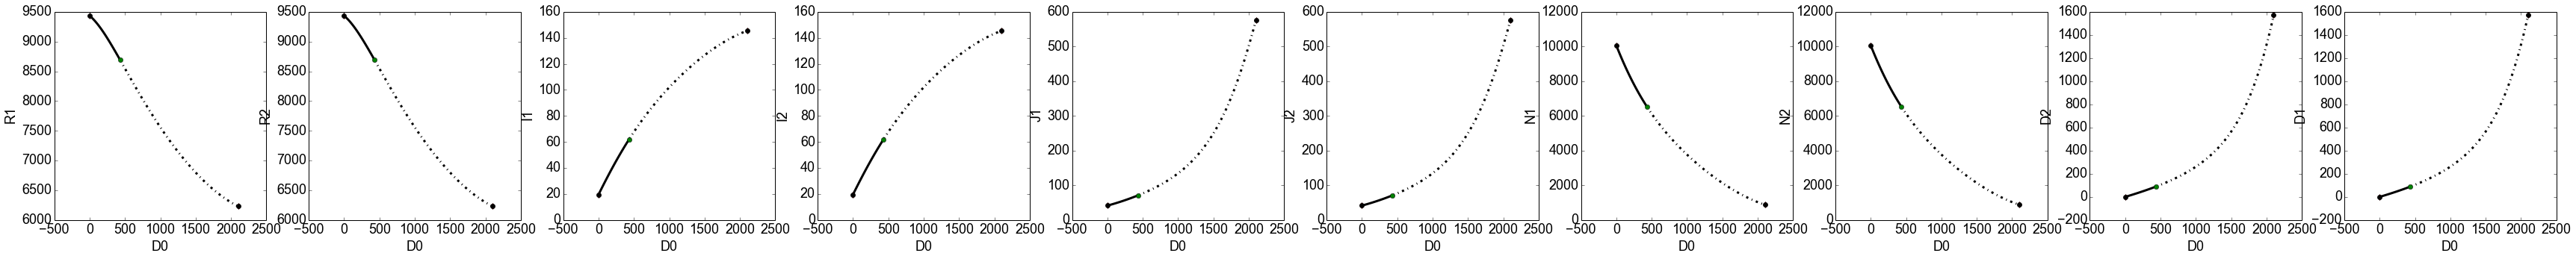

BP Point found 
B Point found 
B Point found 


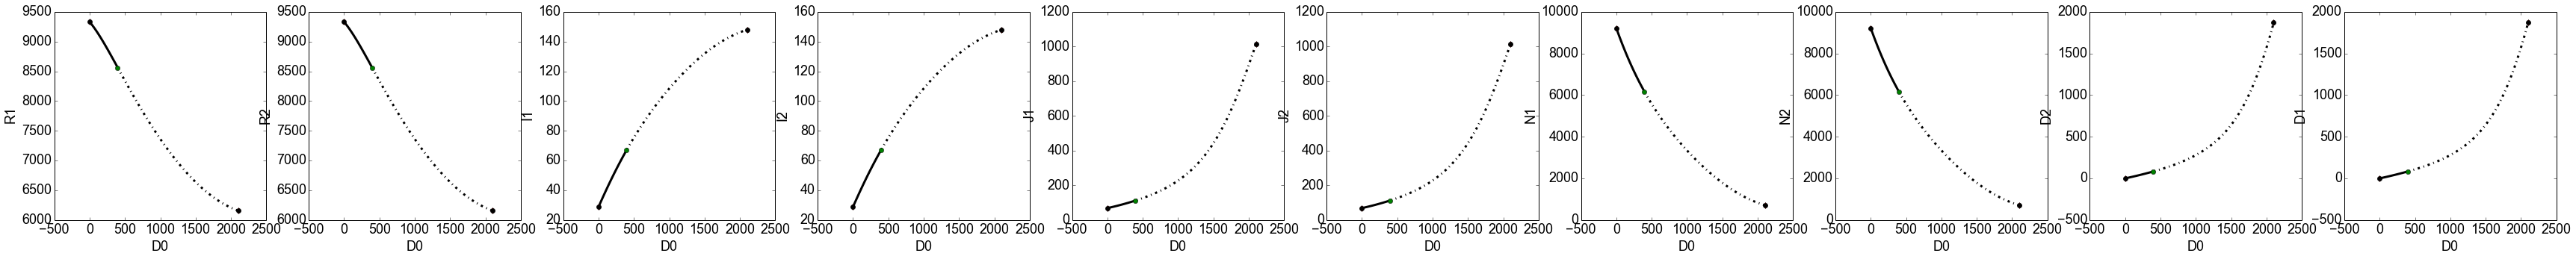

BP Point found 
B Point found 
B Point found 


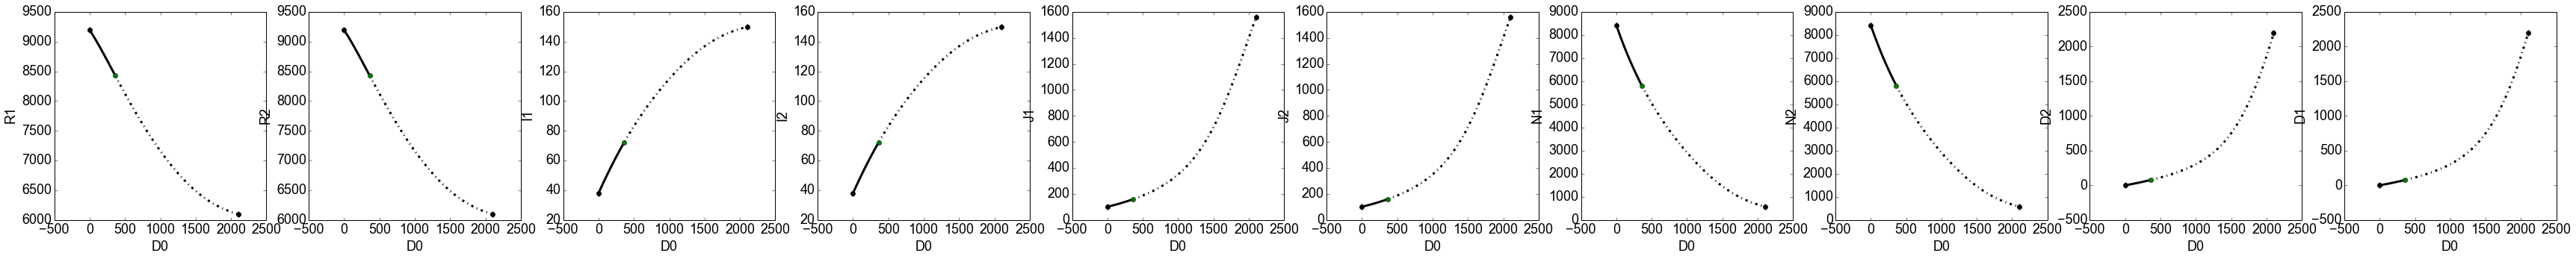

BP Point found 
B Point found 
B Point found 


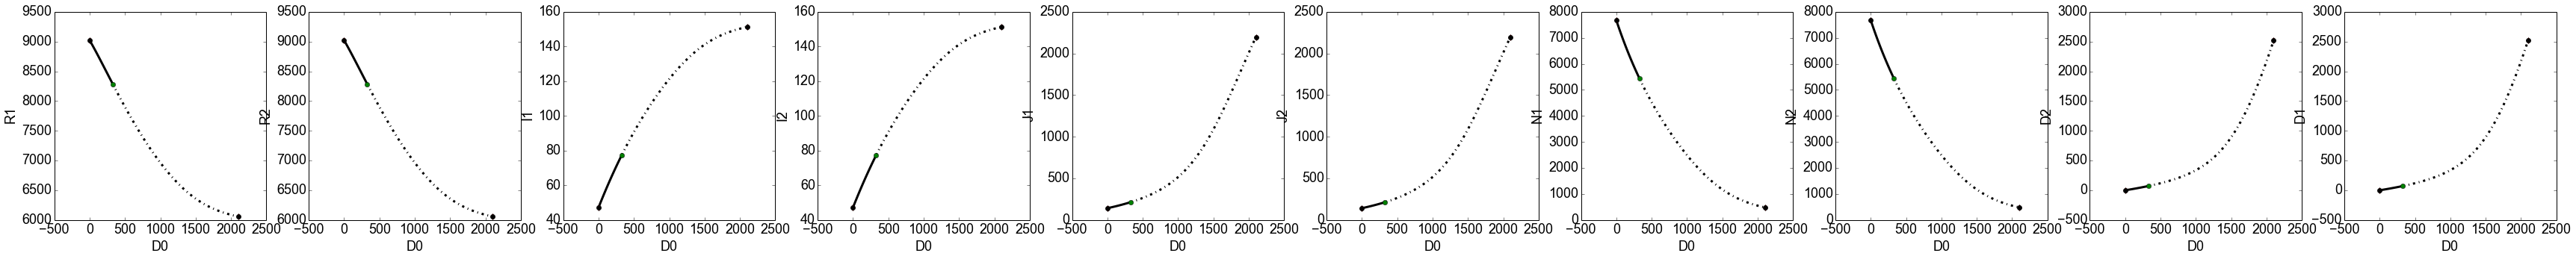

BP Point found 
B Point found 
B Point found 


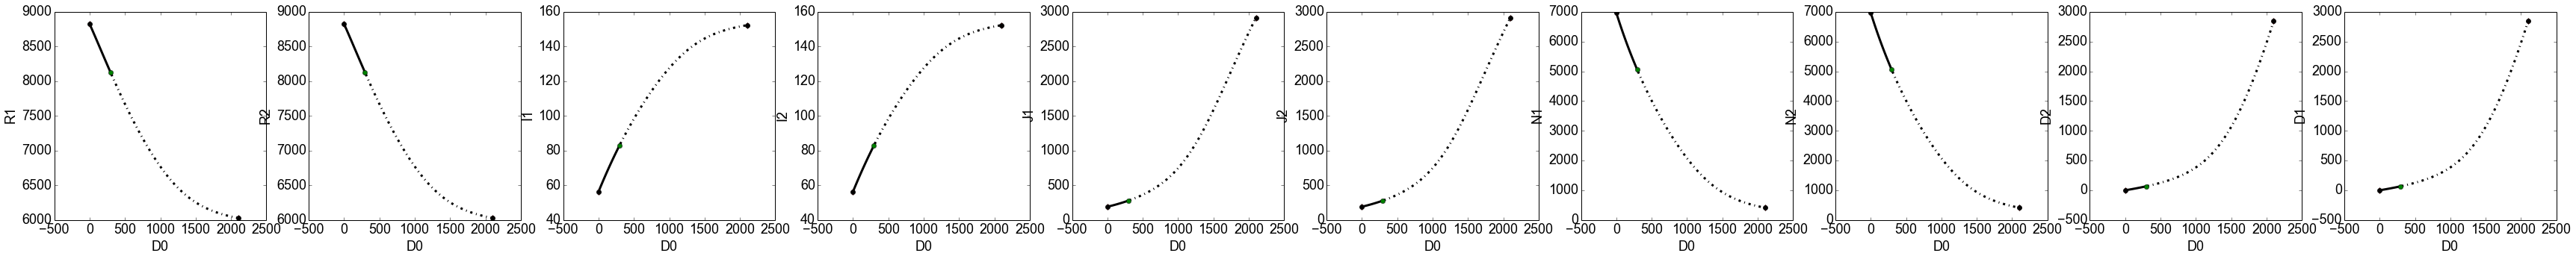

BP Point found 
B Point found 
B Point found 


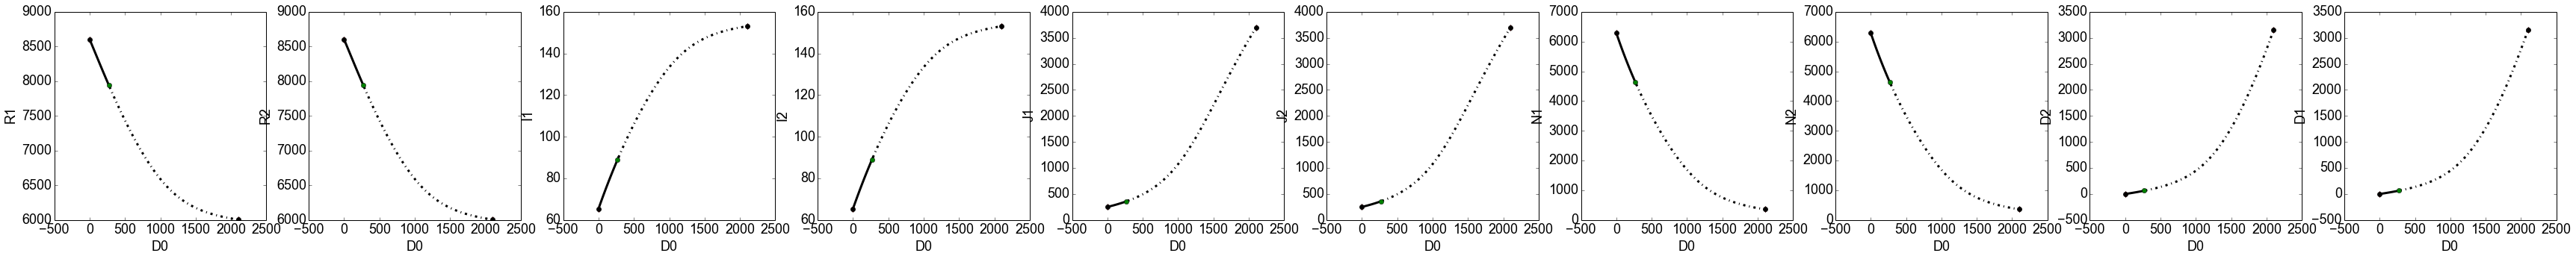

BP Point found 
B Point found 
B Point found 


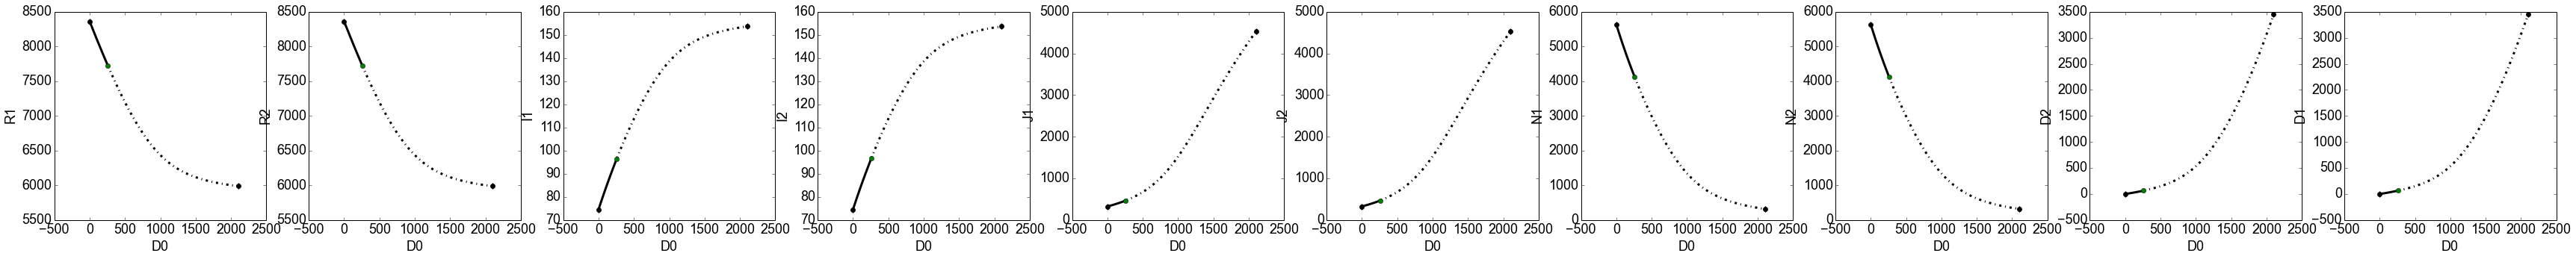

BP Point found 
B Point found 
B Point found 


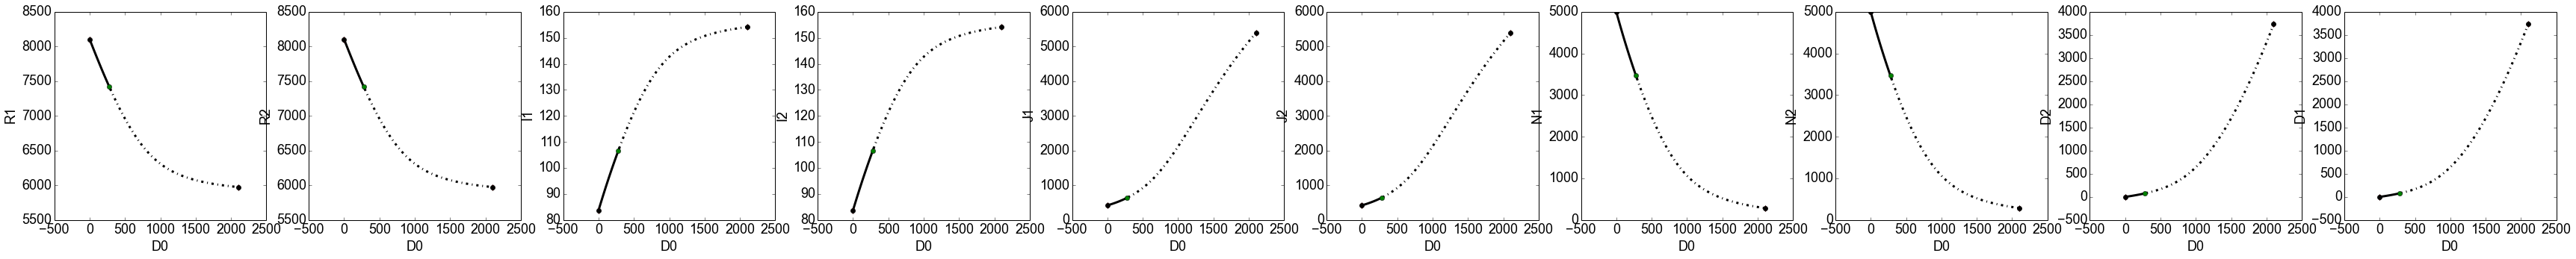

BP Point found 
B Point found 
B Point found 


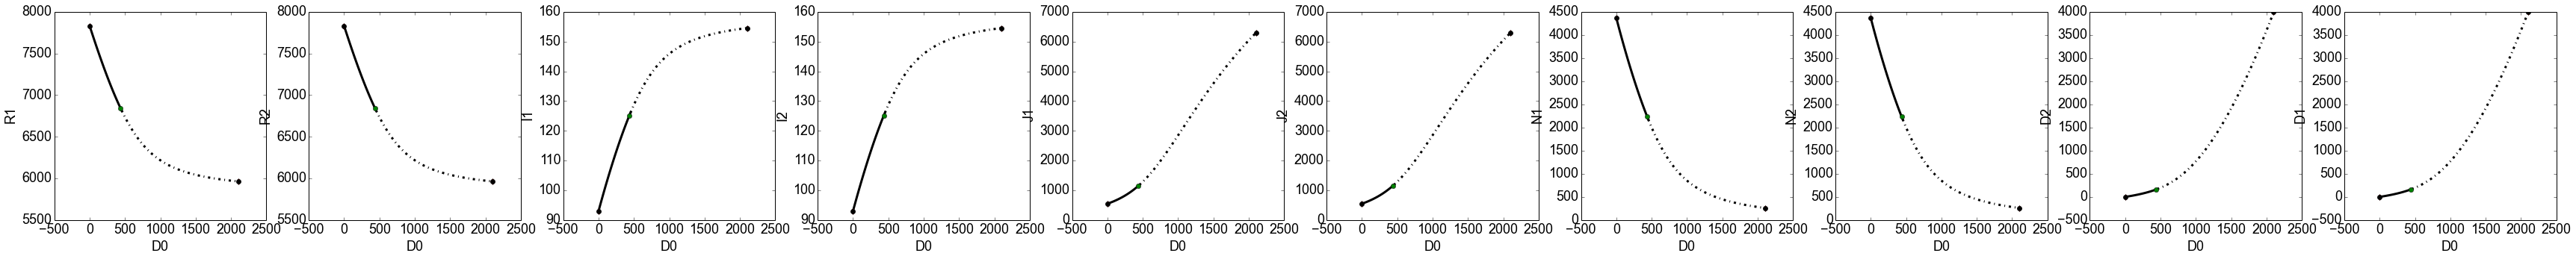

BP Point found 
B Point found 
B Point found 


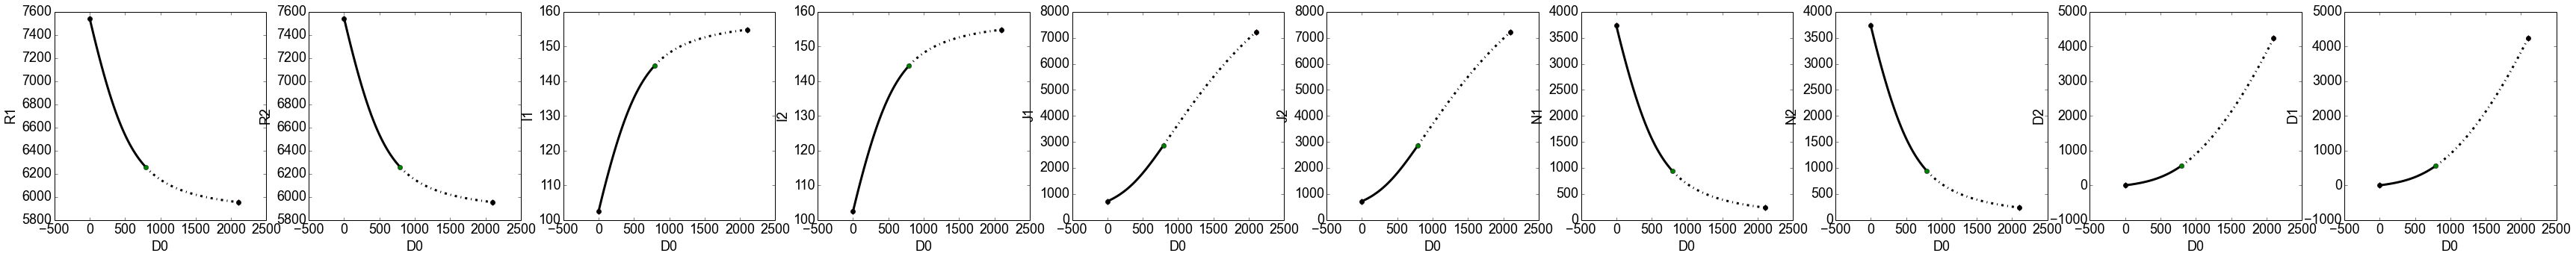

BP Point found 
B Point found 
B Point found 


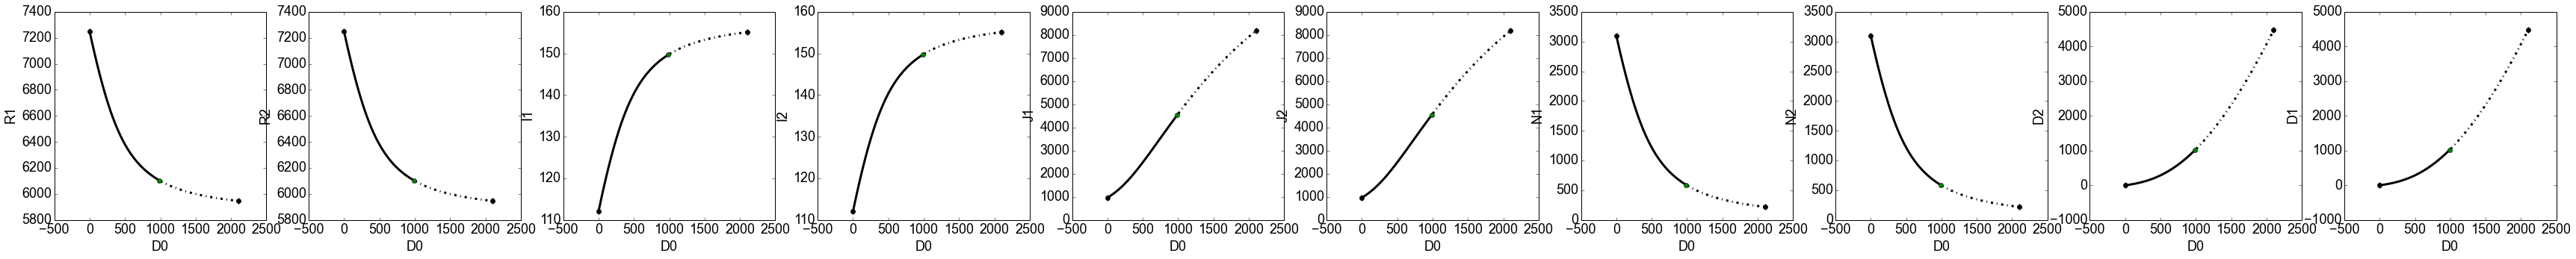

BP Point found 
B Point found 
B Point found 


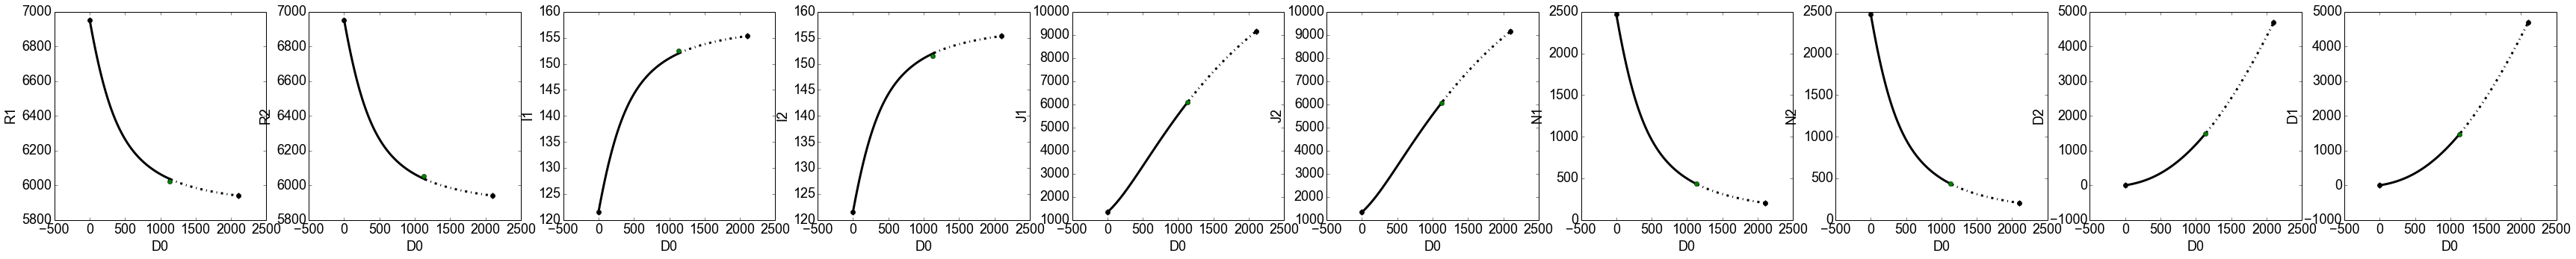

BP Point found 
B Point found 
B Point found 


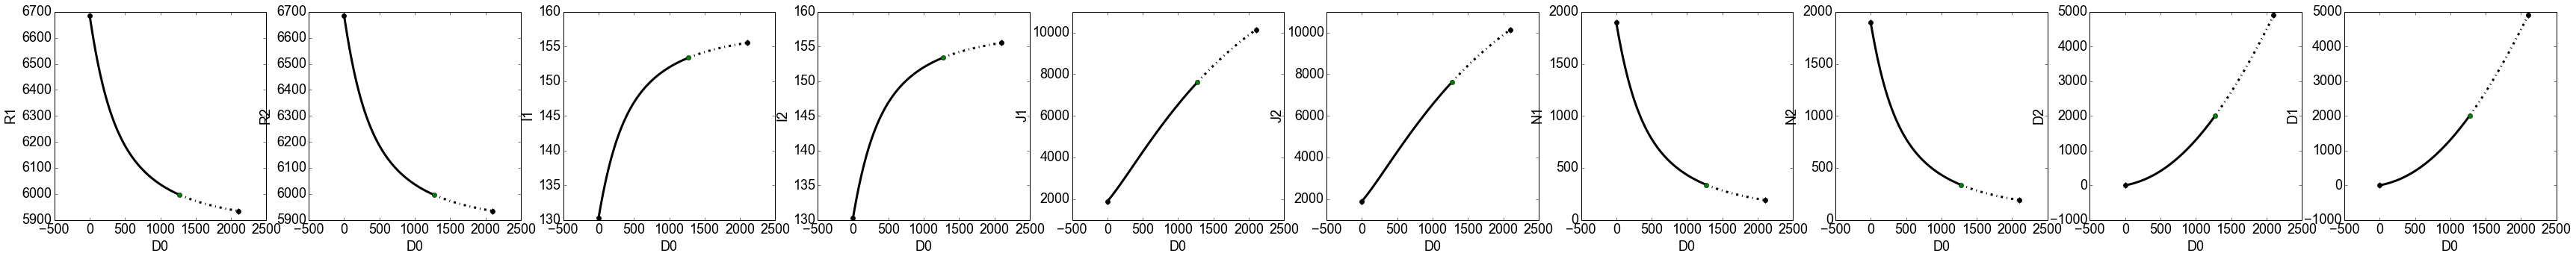

BP Point found 
B Point found 
B Point found 


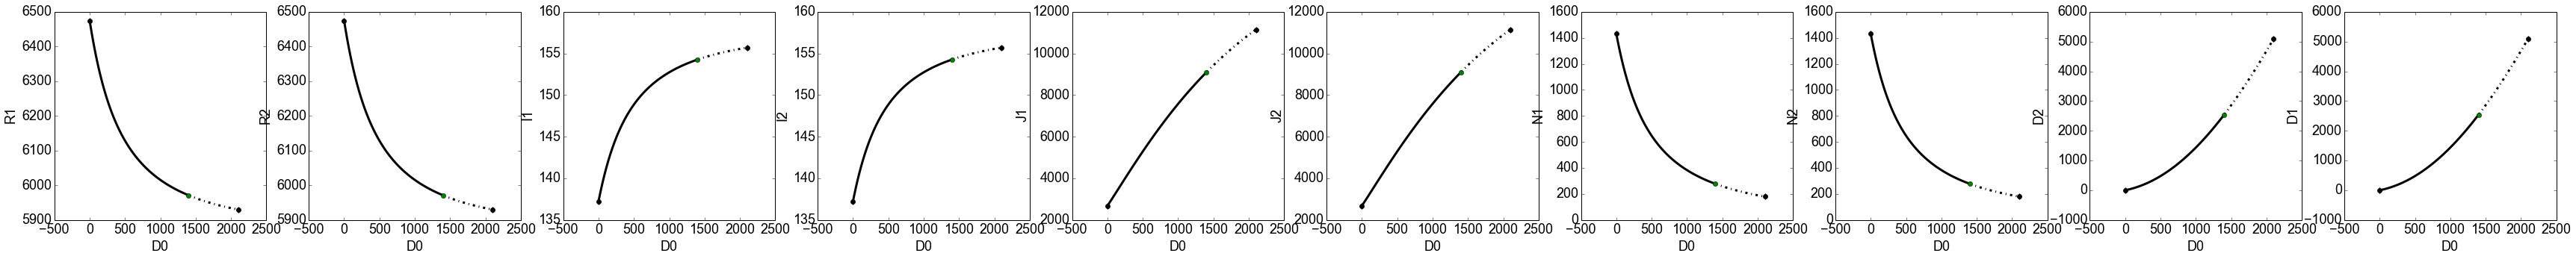

BP Point found 
B Point found 
B Point found 


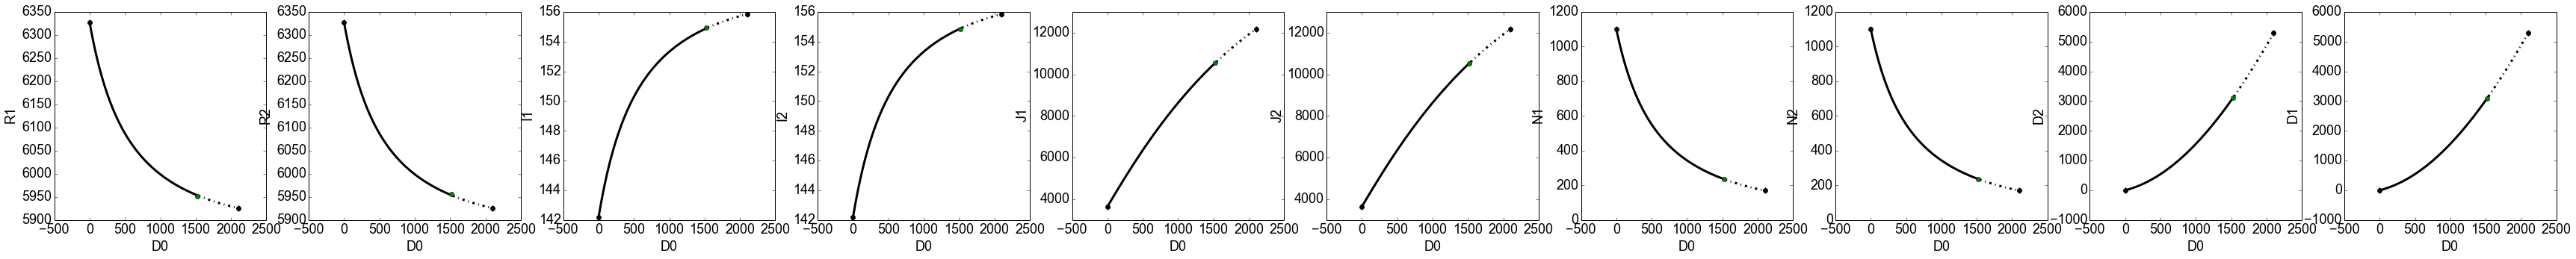

BP Point found 
B Point found 
B Point found 


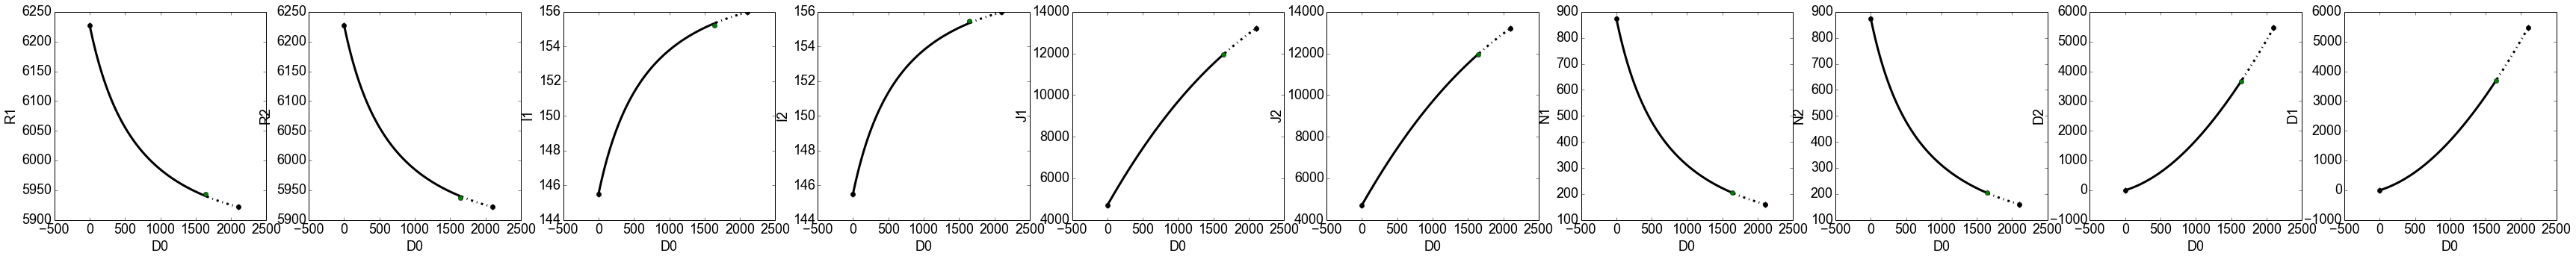

BP Point found 
B Point found 
B Point found 


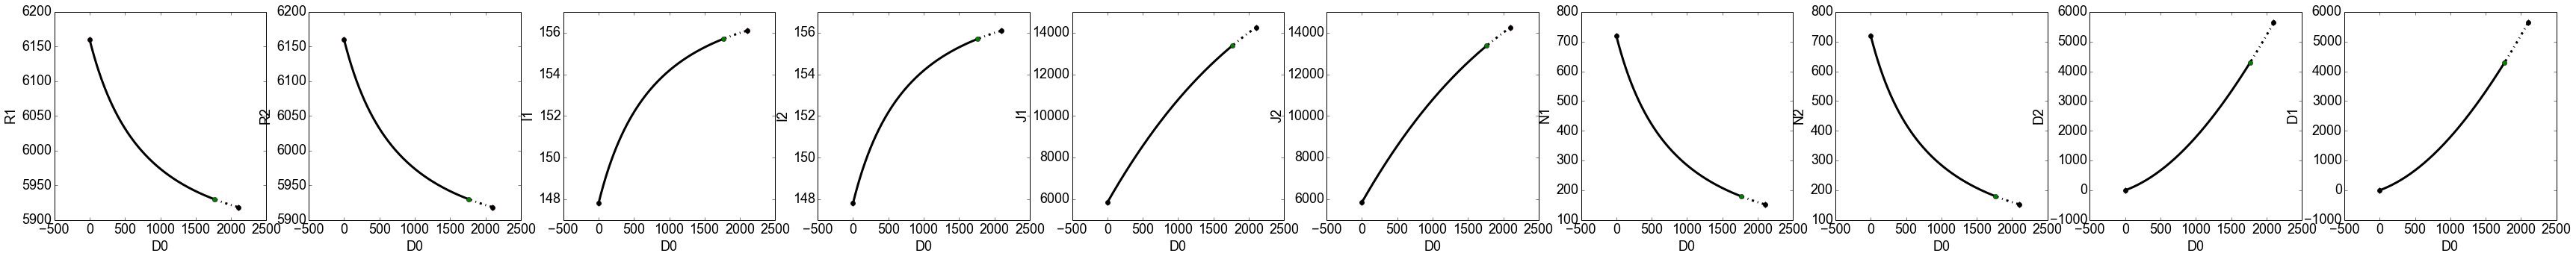

BP Point found 
B Point found 
B Point found 


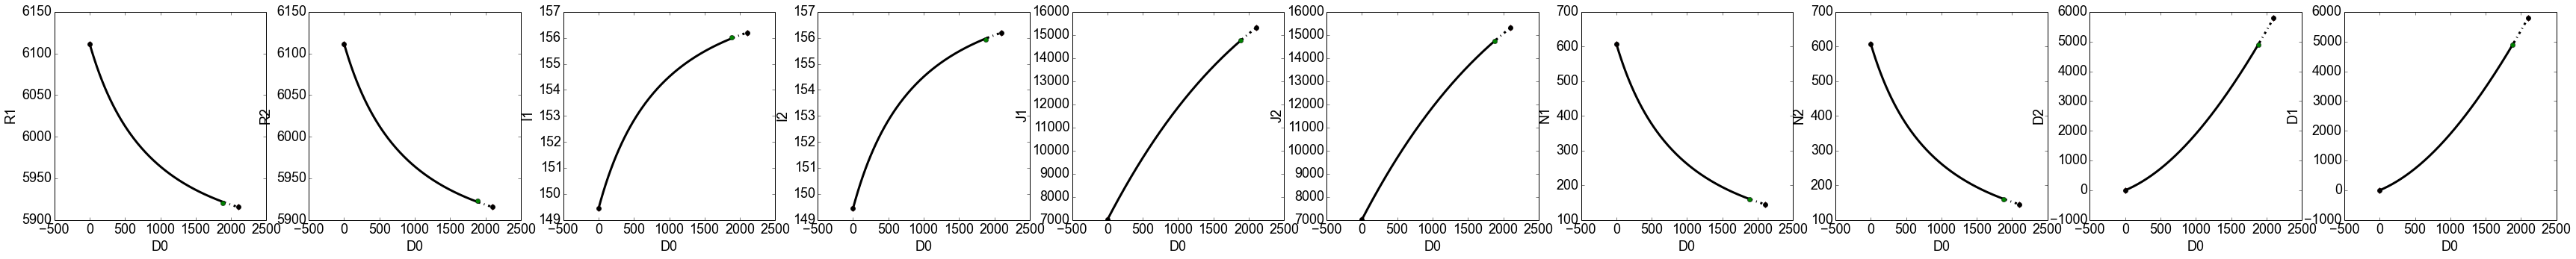

BP Point found 
B Point found 
B Point found 


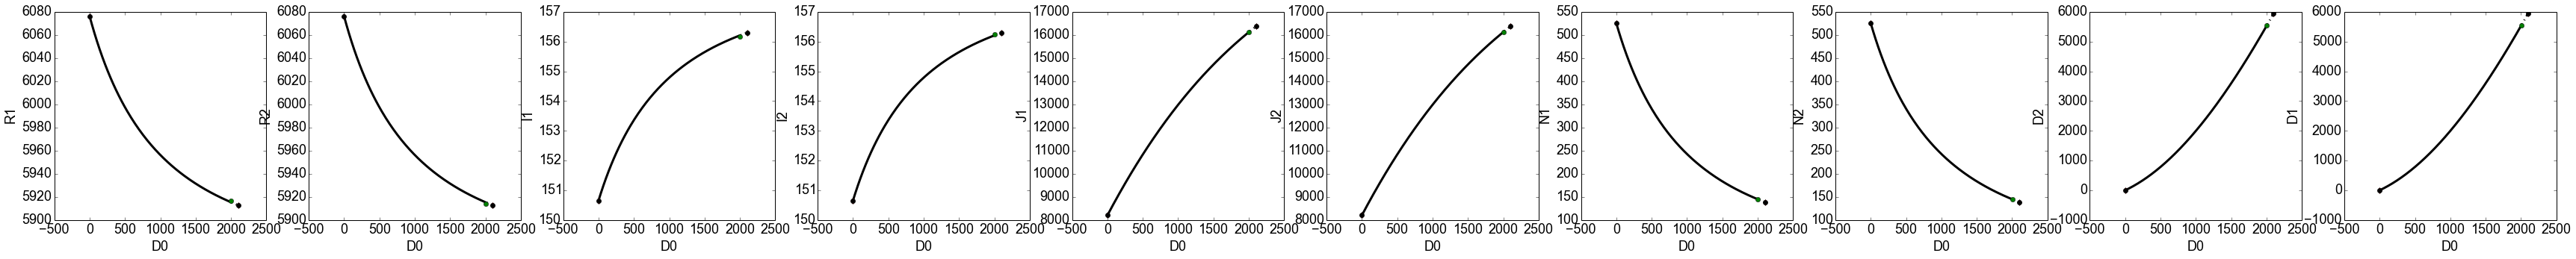

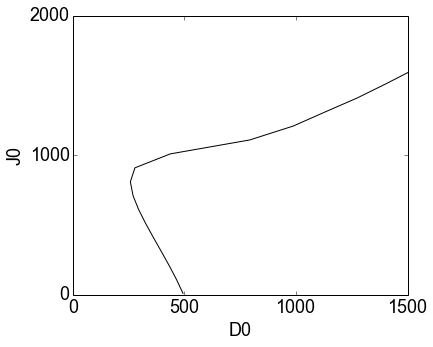

In [6]:
v = 'J0'
r_v = range(10,2011,100)
freepar = 'D0'
DSargs.pdomain[freepar] = [0, 2101]
ODE = Vode_ODEsystem(DSargs)
ODE.set(pars = {'Vt': 200})
aux.plot_phasediagram(ODE, freepar, v, r_v, bif_startpoint=0.1, silence=False, show_continuation=True, 
                      xlim=[0,1500], ylim=[0, 2000], LocBifPoints=['BP','B'], BifPoints='BP',
                      xticks=[0, 500, 1000, 1500], yticks=[0, 1000, 2000], 
                      fig_name='./figures/PhaseDiagram_D0J0_Vt200.pdf')